In [1]:
import pandas as pd
import numpy as np
import string
import pickle
import torch
import tensorflow as tf
from kobert_transformers import get_kobert_model
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
import datetime

In [2]:
lines= pd.read_pickle('hi.pkl')

In [4]:
lines = lines[:50000]
print(lines.head(3))
print(lines.tail(3))

                                          body_nouns  \
0  중증 폐질환 유발 가능성 미국서 건 의심환자 발생 사망국내 상황 악화 판매 금지 고...   
1  제주 최대 밀리미터 물폭탄 제호 태풍 타파 한반도 접근 부산 앞바다 전망 예상 기상...   
2  비바람 행인 우산 토요일 제호 태풍 타파 영향 전국 비 예상 강수량 제주 ∼밀리미터...   

                                       summary_nouns  
0  외국 에디슨 러셀 타격 질주 위 위 러셀 외국 경기 타선 외국 경기 박병호 러셀 러...  
1  세인트루이스 카디널스 구단 코로나 확진자 추가 발생 총 미국 매체 세인트루이스 포스...  
2  롯데 롯데 무실점 노경은 타수 안타 타점 호 - 이날 노경은 이날 노경 안타 볼넷 ...  
                                              body_nouns  \
49997  신종 육식공룡 루소베나토르 산토시 복원 이미 포르투갈 스페인 고생물학자들 신종 육식...   
49998  LGU+ 국내 최대 전략적 제휴유료방송 가입자 잠재고객 흡수 독보적 글로벌 공룡기업...   
49999  공개 삼성전자 갤럭시노트 제품 언팩 티저 광고 강남구 코엑스 광고판 표출 연합뉴스삼...   

                                           summary_nouns  
49997  국내 시장 호령 플랫폼 네이버 카카오 비판 내수 시장 전용 딱지 구글 애플 세계적 ...  
49998  포르투갈 스페인 고생물학자들 신종 육식공룡 발견 포르투갈 리스본대 스페 국립통신대 ...  
49999  글로벌 미디어 공룡 넷플릭스 국내 최대 유료방송 사업자 전략적 제휴 국내 시장 시장...  


In [5]:
lines.columns = ['body','summ']

In [6]:
lines['body']=lines['body'].apply(lambda x: x.lower())
lines['summ']=lines['summ'].apply(lambda x: x.lower())

In [7]:
exclude = set(string.punctuation)
lines.body=lines.body.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
lines.summ=lines.summ.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

In [8]:
print(lines.head(3))
print(lines.tail(3))

                                                body  \
0  중증 폐질환 유발 가능성 미국서 건 의심환자 발생 사망국내 상황 악화 판매 금지 고...   
1  제주 최대 밀리미터 물폭탄 제호 태풍 타파 한반도 접근 부산 앞바다 전망 예상 기상...   
2  비바람 행인 우산 토요일 제호 태풍 타파 영향 전국 비 예상 강수량 제주 ∼밀리미터...   

                                                summ  
0  외국 에디슨 러셀 타격 질주 위 위 러셀 외국 경기 타선 외국 경기 박병호 러셀 러...  
1  세인트루이스 카디널스 구단 코로나 확진자 추가 발생 총 미국 매체 세인트루이스 포스...  
2  롯데 롯데 무실점 노경은 타수 안타 타점 호  이날 노경은 이날 노경 안타 볼넷 삼...  
                                                    body  \
49997  신종 육식공룡 루소베나토르 산토시 복원 이미 포르투갈 스페인 고생물학자들 신종 육식...   
49998  lgu 국내 최대 전략적 제휴유료방송 가입자 잠재고객 흡수 독보적 글로벌 공룡기업 ...   
49999  공개 삼성전자 갤럭시노트 제품 언팩 티저 광고 강남구 코엑스 광고판 표출 연합뉴스삼...   

                                                    summ  
49997  국내 시장 호령 플랫폼 네이버 카카오 비판 내수 시장 전용 딱지 구글 애플 세계적 ...  
49998  포르투갈 스페인 고생물학자들 신종 육식공룡 발견 포르투갈 리스본대 스페 국립통신대 ...  
49999  글로벌 미디어 공룡 넷플릭스 국내 최대 유료방송 사업자 전략적 제휴 국내 시장 시장...  


In [9]:
lines.summ = lines.summ.apply(lambda x : 'sofs '+ x + ' eofs')

In [10]:
print(lines.head(3))
print(lines.tail(3))

                                                body  \
0  중증 폐질환 유발 가능성 미국서 건 의심환자 발생 사망국내 상황 악화 판매 금지 고...   
1  제주 최대 밀리미터 물폭탄 제호 태풍 타파 한반도 접근 부산 앞바다 전망 예상 기상...   
2  비바람 행인 우산 토요일 제호 태풍 타파 영향 전국 비 예상 강수량 제주 ∼밀리미터...   

                                                summ  
0  sofs 외국 에디슨 러셀 타격 질주 위 위 러셀 외국 경기 타선 외국 경기 박병호...  
1  sofs 세인트루이스 카디널스 구단 코로나 확진자 추가 발생 총 미국 매체 세인트루...  
2  sofs 롯데 롯데 무실점 노경은 타수 안타 타점 호  이날 노경은 이날 노경 안타...  
                                                    body  \
49997  신종 육식공룡 루소베나토르 산토시 복원 이미 포르투갈 스페인 고생물학자들 신종 육식...   
49998  lgu 국내 최대 전략적 제휴유료방송 가입자 잠재고객 흡수 독보적 글로벌 공룡기업 ...   
49999  공개 삼성전자 갤럭시노트 제품 언팩 티저 광고 강남구 코엑스 광고판 표출 연합뉴스삼...   

                                                    summ  
49997  sofs 국내 시장 호령 플랫폼 네이버 카카오 비판 내수 시장 전용 딱지 구글 애플...  
49998  sofs 포르투갈 스페인 고생물학자들 신종 육식공룡 발견 포르투갈 리스본대 스페 국...  
49999  sofs 글로벌 미디어 공룡 넷플릭스 국내 최대 유료방송 사업자 전략적 제휴 국내 ...  


In [11]:
lines.shape

(50000, 2)

In [12]:
# fit a tokenizer
from keras.preprocessing.text import Tokenizer
def create_tokenizer(lines):
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

In [13]:
import json
body_tokenizer = create_tokenizer(lines['body'])
body_dict=json.loads(json.dumps(body_tokenizer.word_counts))
df =pd.DataFrame([body_dict.keys(), body_dict.values()]).T
df.columns = ['word','count']
df = df.sort_values(by='count',ascending = False)
df['cum_count']=df['count'].cumsum()
df['cum_perc'] = df['cum_count']/df['cum_count'].max()
final_body_words = df[df['cum_perc']<0.8]['word'].values

In [14]:
summ_tokenizer = create_tokenizer(lines['summ'])
summ_dict = json.loads(json.dumps(summ_tokenizer.word_counts))
df =pd.DataFrame([summ_dict.keys(), summ_dict.values()]).T
df.columns = ['word','count']
df = df.sort_values(by='count',ascending = False)
df['cum_count']=df['count'].cumsum()
df['cum_perc'] = df['cum_count']/df['cum_count'].max()
final_summ_words = df[df['cum_perc']<0.8]['word'].values

In [15]:
print(len(final_body_words),len(final_summ_words))

9170 4879


In [16]:
def filter_body_words(x):
  t = []
  x = x.split()
  for i in range(len(x)):
    if x[i] in final_body_words:
      t.append(x[i])
    else:
      t.append('unk')
  x3 = ''
  for i in range(len(t)):
    x3 = x3+t[i]+' '
  return x3

In [17]:
filter_body_words('우한 중국 대통령')

'우한 중국 대통령 '

In [18]:
def filter_summ_words(x):
  t = []
  x = x.split()
  for i in range(len(x)):
    if x[i] in final_summ_words:
      t.append(x[i])
    else:
      t.append('unk')
  x3 = ''
  for i in range(len(t)):
    x3 = x3+t[i]+' '
  return x3

In [20]:
from tqdm import tqdm

for i in tqdm(range(len(lines['body']))):
    lines['body'][i] = filter_body_words(lines['body'][i])    

100%|██████████| 50000/50000 [1:00:42<00:00, 13.73it/s]


In [21]:
for i in tqdm(range(len(lines['summ']))):
    lines['summ'][i] = filter_summ_words(lines['summ'][i])    

100%|██████████| 50000/50000 [03:13<00:00, 257.87it/s]


In [22]:
lines.to_pickle('lines.pkl')

In [23]:
lines=pd.read_pickle('lines.pkl')

In [24]:
all_body_words=set()
for body in lines.body:
    for word in body.split():
        if word not in all_body_words:
            all_body_words.add(word)
    
all_summ_words=set()
for summ in lines.summ:
    for word in summ.split():
        if word not in all_summ_words:
            all_summ_words.add(word)

In [25]:
input_words = sorted(list(all_body_words))
target_words = sorted(list(all_summ_words))
num_encoder_tokens = len(all_body_words)
num_decoder_tokens = len(all_summ_words)

In [26]:
set(all_summ_words) - set(final_summ_words) 

{'unk'}

In [27]:
len(all_body_words)

9171

In [28]:
len(target_words)

4880

In [29]:
input_token_index = dict(
    [(word, i+1) for i, word in enumerate(input_words)])
target_token_index = dict(
    [(word, i+1) for i, word in enumerate(target_words)])

In [30]:
num_decoder_tokens

4880

In [42]:
print(input_token_index['unk'])
print(target_token_index['sofs'])
print(target_token_index['eofs'])
print(list(input_token_index.keys())[27])
print(list(target_token_index.keys())[7])
print(list(target_token_index.keys())[0])

26
8
1
who
sofs
eofe


In [31]:
length_list=[]
for l in lines.summ:
    length_list.append(len(l.split(' ')))
summ_max_length = np.max(length_list)

In [32]:
length_list=[]
for l in lines.body:
    length_list.append(len(l.split(' ')))
body_max_length = np.max(length_list)

In [33]:
print(body_max_length)
print(summ_max_length)

7028
84


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff50fe174f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff50fe17bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff50fe17190>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff50fda92b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff50fda9610>],
 'means': []}

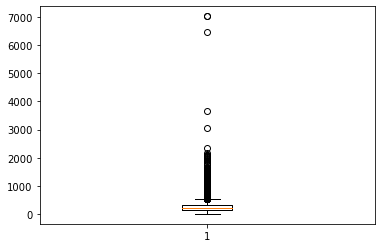

In [34]:
import matplotlib.pyplot as plt
plt.boxplot(length_list)

In [35]:
body_max_length = 300
summ_max_length = 50

In [36]:
encoder_input_data = np.zeros(
    (len(lines['body']), body_max_length),
    dtype='float32')
decoder_input_data = np.zeros(
    (len(lines['summ']), summ_max_length),
    dtype='float32')
decoder_target_data = np.zeros(
    (len(lines['summ']), summ_max_length, num_decoder_tokens+1),
    dtype='float32')

In [37]:
decoder_target_data.shape

(50000, 50, 4881)

In [38]:
lines['summ']

0        sofs 외국 unk unk 타격 unk 위 위 unk 외국 경기 unk 외국 경기...
1        sofs unk unk unk 코로나 확진자 추가 발생 총 미국 매체 unk unk...
2        sofs 롯데 롯데 unk unk unk unk unk 호 이날 unk 이날 unk...
3        sofs unk unk unk unk 과거 unk unk unk unk 주장 unk...
4        sofs 정부 액상형 전자담배 사용 자제 권고 복지부 미국 사례 unk 액상형 전자...
                               ...                        
49995    sofs 삼성전자 갤럭시 언팩 unk unk 삼성전자 행사 갤럭시노트 시리즈 unk...
49996    sofs 삼성전자 중국 unk unk unk 생산 공장 폐쇄 삼성전자 회사 설립 u...
49997    sofs 국내 시장 unk 플랫폼 네이버 카카오 비판 내수 시장 전용 unk 구글 ...
49998    sofs unk 스페인 unk 신종 unk 발견 unk unk 스페 unk unk ...
49999    sofs 글로벌 미디어 공룡 넷플릭스 국내 최대 유료방송 사업자 전략적 제휴 국내 ...
Name: summ, Length: 50000, dtype: object

In [39]:
for i, (input_text, target_text) in enumerate(zip(lines['body'], lines['summ'])):
    for t, word in enumerate(input_text.split()):
        if t==300:
            break
        encoder_input_data[i, t] = input_token_index[word]
        
    for t, word in enumerate(target_text.split()):
        
        if t==50:
            break
            
        if t==49:
            word='eofs'
        decoder_input_data[i, t] = target_token_index[word]
        if t>0:
            decoder_target_data[i, t - 1, target_token_index[word]] = 1.
            if t== len(target_text.split())-1 or t==49:
                decoder_target_data[i, t:, target_token_index['eofs']] = 1 #eos


In [40]:
print(decoder_input_data.shape,encoder_input_data.shape,decoder_target_data.shape)

(50000, 50) (50000, 300) (50000, 50, 4881)


In [41]:
decoder_input_data[10000]

array([  21., 1045., 4360., 1017., 4769., 1460., 2378.,  454., 4769.,
       1776., 1232., 4360., 1017., 2352., 3708., 4769., 2860.,  579.,
       1240., 1578., 4351., 2352., 3708., 1386., 4734., 4360., 1017.,
       2352., 3708., 1386., 4734.,    5.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.], dtype=float32)

In [42]:
decoder_target_data[10000][40]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [43]:
for i in range(decoder_input_data.shape[0]):
    for j in range(decoder_input_data.shape[1]):
        if(decoder_input_data[i][j]==0):
            decoder_input_data[i][j] = target_token_index['eofs'] #eos

In [44]:
split_ratio = 0.8
cut = int(len(decoder_input_data)*split_ratio)
cut

40000

In [45]:
#8/2
enc_train = encoder_input_data[:cut]
enc_val = encoder_input_data[cut:]

dec_in_train = decoder_input_data[:cut]
dec_in_val = decoder_input_data[cut:]

dec_out_train = decoder_target_data[:cut]
dec_out_val = decoder_target_data[cut:]

In [50]:
from keras import Model
from keras.layers import Embedding, LSTM, Dropout, Input, Dense, dot, concatenate, Activation, Bidirectional
from keras.optimizers import Adam
from keras.layers import Embedding
from keras import regularizers

class Seq2Seq_Attention():
    def __init__(self):
        self.max_length = 300
        self.body_VECTOR_SIZE = 128
        self.sum_VECTOR_SIZE = 128
        self.max_summary_length = 50
        self.num_words = num_decoder_tokens
        self.optimizer = Adam(learning_rate=0.001)
        self.body_num_words = num_encoder_tokens
        
        self.att = self.build_att()

        self.att.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=self.optimizer)
        print(self.att.summary())
        
        
    def build_att(self):
        #encoder
        encoder_inputs = Input(shape=(self.max_length,))
        embedded_e = Embedding(self.body_num_words+1,self.body_VECTOR_SIZE)(encoder_inputs)
        encoder_outputs, h, c = LSTM(128, dropout=0.4, return_state=True, return_sequences=True, kernel_regularizer=regularizers.l2(0.01))(embedded_e)
        init_states = [h,c]
        
        #decoder
        decoder_inputs = Input(shape=(self.max_summary_length,))
        embedded_d = Embedding(self.num_words+1,self.sum_VECTOR_SIZE)(decoder_inputs) #embedding이 다르니깐 vector size다르게 해도 괜찮.
        decoder_outputs = LSTM(128, return_sequences=True)(embedded_d, initial_state=init_states) #Discard encoder outputs
        
        #attention
        value = Dense(5000, activation='tanh')(encoder_outputs)
        query = Dense(5000, activation='tanh')(decoder_outputs)
        print(value, query) #300x5000 두개
        
        attention = dot([query, value],axes=[2,2])
        print(attention) #300x300
        
        attention = Dense(self.max_length, activation='tanh')(attention)
        attention_softmaxed = Activation('softmax')(attention)
        
        weighted = dot([attention_softmaxed, encoder_outputs], axes=[2,1]) #give weights to encoder outputs(=각 토큰)
        
        #combine attention & decoder output
        decoder_for_final = concatenate([weighted, decoder_outputs]) #weighted token(2064x256) + decoder output(2064x256)
        
        #estimate summary
        decoder_for_final = Dense(5000, activation='tanh')(decoder_for_final)
        decoder_final = Dense(self.num_words+1, activation='softmax')(decoder_for_final)
        
        mod = Model(inputs=[encoder_inputs, decoder_inputs], outputs=[decoder_final]) 
        return mod
    
    

    #Get train/val data of batch size
    def load_batch(self, batch_size=64):
        
        self.n_batches = int(cut/batch_size)
        val_size = int(batch_size*(1-split_ratio))
        
        for i in range(self.n_batches):
            #train data
            batch_e = enc_train[i*batch_size:(i+1)*batch_size]
            batch_d = dec_in_train[i*batch_size:(i+1)*batch_size]
            batch_d_o = dec_out_train[i*batch_size:(i+1)*batch_size]
                        
            #val data
            val_e = enc_val[i*val_size:(i+1)*val_size]
            val_d = dec_in_val[i*val_size:(i+1)*val_size]
            val_d_o = dec_out_val[i*val_size:(i+1)*val_size]    

            yield batch_e, batch_d, batch_d_o, val_e, val_d, val_d_o
    
    
    #train model
    def train(self, epochs, batch_size = 64):
        train_losses = []
        train_acc = []
        
        val_losses = []
        val_acc = []
        
        start_time = datetime.datetime.now()
        
        for epoch in range(epochs):
            for batch_i, (enc_batch, dec_batch, dec_out_batch, enc_val, dec_val, dec_out_val) in enumerate(self.load_batch(batch_size)):
                
                enc_batch = np.array(enc_batch)
                dec_batch = np.array(dec_batch)
                dec_out_batch = np.array(dec_out_batch)
                
                enc_val = np.array(enc_val)
                dec_val = np.array(dec_val)
                dec_out_val = np.array(dec_out_val)
                
                if batch_i==0:
                    print(enc_batch.shape, dec_batch.shape, dec_out_batch.shape, enc_val.shape, dec_val.shape, dec_out_val.shape)
                
                
                hist = self.att.train_on_batch([enc_batch, dec_batch], dec_out_batch)
                valhist = self.att.test_on_batch([enc_val, dec_val], dec_out_val)
                
                train_losses.append(hist[0])
                train_acc.append(hist[1])
                
                val_losses.append(valhist[0])
                val_acc.append(valhist[1])            
            
                elapsed_time = datetime.datetime.now() - start_time
                
                if batch_i%1000==0:
                    print("Time Elapsed %s [Epoch %d/%d] [Batch %d/%d] Train Loss: %04f Train Acc:%04f Valid Loss: %04f Valid Acc:%04f"\
                          %(elapsed_time, epoch, epochs, batch_i, self.n_batches, hist[0], hist[1], valhist[0], valhist[1]))
                    
        return train_losses, train_acc, val_losses, val_acc

In [51]:
model = Seq2Seq_Attention()

Tensor("dense/Identity:0", shape=(None, 300, 5000), dtype=float32) Tensor("dense_1/Identity:0", shape=(None, 50, 5000), dtype=float32)
Tensor("dot/Identity:0", shape=(None, 50, 300), dtype=float32)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 300)]        0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 300, 128)     1174016     input_5[0][0]                    
______________________________________________________________________________________________

In [ ]:
train_losses, train_accs, val_losses, val_accs = model.train(epochs=200, batch_size=32)

(32, 300) (32, 50) (32, 50, 4881) (6, 300) (6, 50) (6, 50, 4881)
Time Elapsed 0:00:06.978871 [Epoch 0/200] [Batch 0/1250] Train Loss: 10.547372 Train Acc:0.000000 Valid Loss: 10.386836 Valid Acc:0.460000
Time Elapsed 0:02:05.064220 [Epoch 0/200] [Batch 1000/1250] Train Loss: 2.660691 Train Acc:0.620625 Valid Loss: 2.957438 Valid Acc:0.560000
(32, 300) (32, 50) (32, 50, 4881) (6, 300) (6, 50) (6, 50, 4881)
Time Elapsed 0:02:34.475365 [Epoch 1/200] [Batch 0/1250] Train Loss: 2.860932 Train Acc:0.619375 Valid Loss: 2.757629 Valid Acc:0.576667
Time Elapsed 0:04:22.565882 [Epoch 1/200] [Batch 1000/1250] Train Loss: 2.389834 Train Acc:0.627500 Valid Loss: 2.754402 Valid Acc:0.573333
(32, 300) (32, 50) (32, 50, 4881) (6, 300) (6, 50) (6, 50, 4881)
Time Elapsed 0:04:49.580674 [Epoch 2/200] [Batch 0/1250] Train Loss: 2.579387 Train Acc:0.635625 Valid Loss: 2.541826 Valid Acc:0.583333
Time Elapsed 0:06:37.546202 [Epoch 2/200] [Batch 1000/1250] Train Loss: 2.231022 Train Acc:0.631875 Valid Loss: 

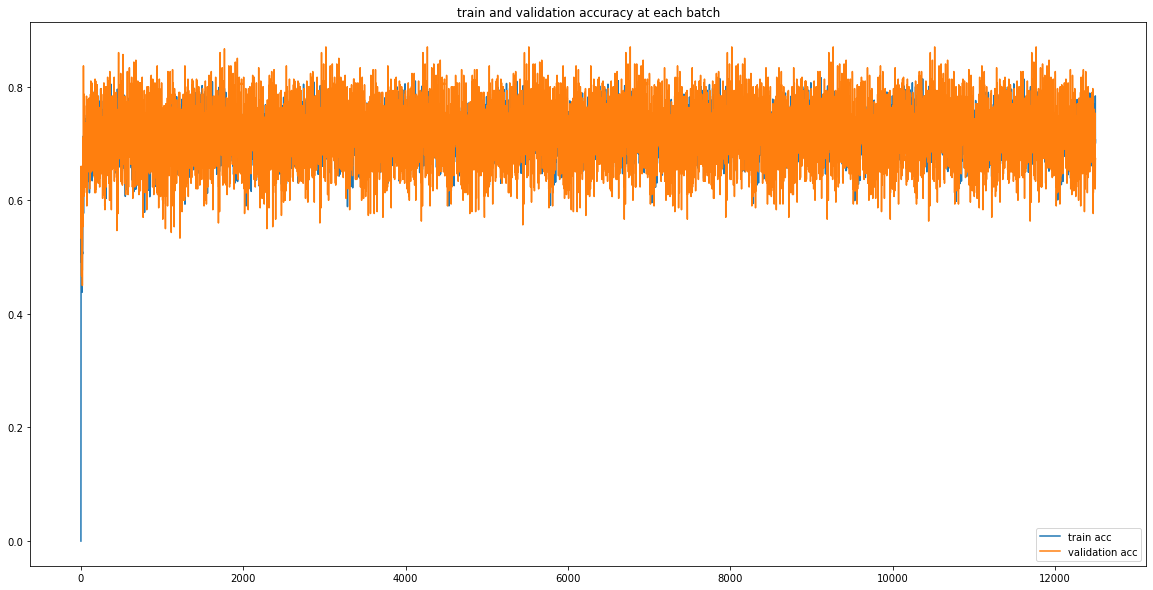

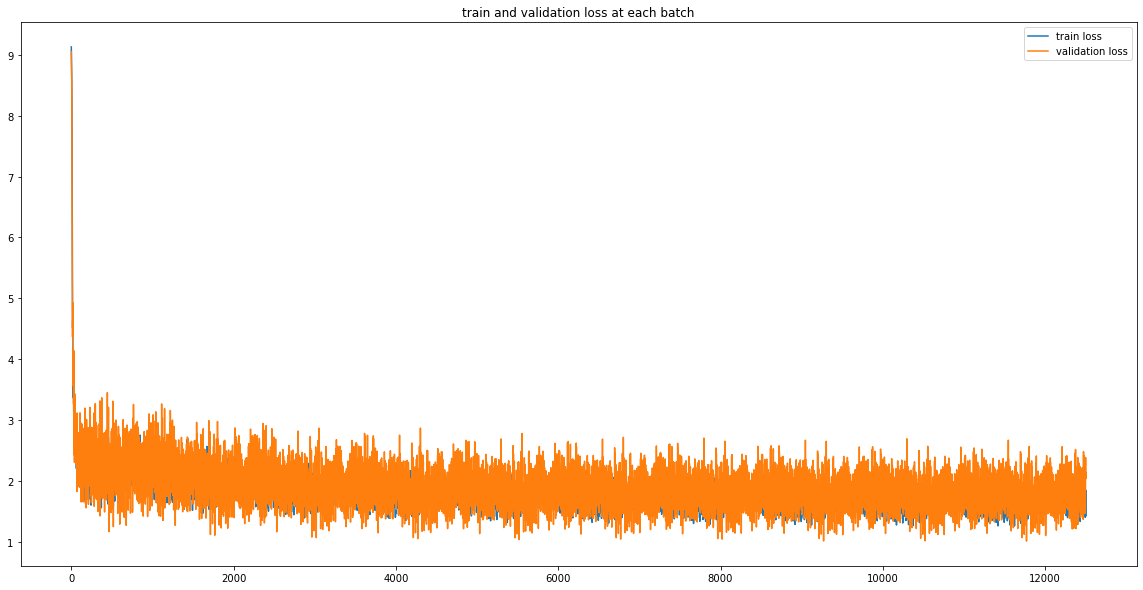

In [86]:
import matplotlib.pyplot as plt
batches = range(1,len(train_accs)+1)

plt.figure(figsize=(20,10))
plt.plot(batches,train_accs,label='train acc')
plt.plot(batches,val_accs,label='validation acc')
plt.title('train and validation accuracy at each batch')
plt.legend()

plt.figure(figsize=(20,10))
plt.plot(batches,train_losses,label='train loss')
plt.plot(batches,val_losses,label='validation loss')
plt.title('train and validation loss at each batch')
plt.legend()

plt.show()

In [87]:
model3 = model.att

In [89]:
decoder_input_data_pred = np.zeros(
    (len(lines.summ), summ_max_length),
    dtype='float32')

final_pred_att = []
for i in range(1):
  word = 11
  for j in range(summ_max_length):
    decoder_input_data_pred[i, j] = word
    pred = model3.predict([encoder_input_data[i].reshape(1,body_max_length),decoder_input_data_pred[i].reshape(1,summ_max_length)])
    t = np.argmax(pred[0][j])
    word = t
    if word==1:
      break
  final_pred_att.append(list(decoder_input_data_pred[i]))

In [90]:
print(final_pred_att[0])

[11.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0]


In [91]:
final_pred2_att = np.array(final_pred_att)
count = 0
correct_count = 0

for i in range(1):
  correct_count += np.sum((decoder_input_data[i]==final_pred2_att[i]) & (decoder_input_data[i]!=1))
  count += np.sum(decoder_input_data[i]!=1)
correct_count/count  

0.7346938775510204

In [92]:
k = 0

In [93]:
for k in range(0,10):
    t = model3.predict([encoder_input_data[k].reshape(1,encoder_input_data.shape[1]),decoder_input_data[k].reshape(1,decoder_input_data.shape[1])]).reshape(decoder_input_data.shape[1], num_decoder_tokens+1)
    
    #답
    tmp=[]
    for i in range(len(encoder_input_data[k])):
      if int(encoder_input_data[k][i])!=0:
        tmp.append(list(input_token_index.keys())[int(encoder_input_data[k][i]-1)])
    print(tmp)
    
    tmp = []
    t2 = np.argmax(t,axis=1)
    for i in range(len(t2)):
      if int(t2[i])!=0:
        tmp.append(list(target_token_index.keys())[int(t2[i]-1)])
    print(tmp)
    print()

['중증', 'unk', '유발', '가능성', 'unk', '건', 'unk', '발생', 'unk', '상황', '악화', '판매', '금지', '고려', '서울', '강남구', 'unk', '전자담배', 'unk', '판매점', '정부', 'unk', '전자담배', '사용', '자제', '권고', '미국', 'unk', '전자담배', '관련', '중증', 'unk', '발생', '사망자', '발생', '조치', '국내', 'unk', 'unk', '중증', 'unk', 'unk', '발생', '보건복지부', 'unk', 'unk', '위원장', 'unk', 'unk', '전자담배', '사용', '자제', '권고', '내용', '대책', '마련', '공개', '정부', '국내', '환자', '발생', '외국', '판매', '금지', '조치', '판매', '금지', '강력', '조치', 'unk', '미국', 'unk', 'unk', '별', '약', '건', 'unk', '발생', '미국', 'unk', 'unk', 'unk', '기준', '전자담배', '중증', 'unk', 'unk', '확실', '확률', '의심', 'unk', '약', '남성', 'unk', 'unk', 'unk', '사망자', '발생', '대부분', '호흡기', '증', '기침', 'unk', 'unk', '호소', '일부', 'unk', 'unk', 'unk', '증', 'unk', '발열', 'unk', 'unk', 'unk', '전자담배', 'unk', 'unk', '전용', 'unk', 'unk', 'unk', '미국', '정부', '중증', '폐', '질환', 'unk', '규명', '조사', '완료', 'unk', '전자담배', '사용', '자제', '권고', '상태', '청소년', 'unk', 'unk', '전자담배', '판매', '금지', '조치', '발표', '복지부', '미국', '사례', 'unk', 'unk', '전자담배', '사용', 'unk', '발생', '

In [124]:
for i in range(len(encoder_input_data[k])):
  if int(encoder_input_data[k][i])!=0:
    print(list(input_token_index.keys())[int(encoder_input_data[k][i]-1)])

unk
unk
유발
가능성
unk
건
unk
발생
unk
상황
악화
판매
금지
고려
서울
강남구
액상형
전자담배
unk
unk
정부
액상형
전자담배
사용
자제
권고
미국
액상형
전자담배
관련
unk
unk
발생
사망자
발생
조치
국내
액상형
unk
unk
unk
unk
발생
보건복지부
unk
unk
위원장
unk
액상형
전자담배
사용
자제
권고
내용
대책
마련
공개
정부
국내
환자
발생
외국
판매
금지
조치
판매
금지
강력
조치
unk
미국
unk
unk
별
약
건
unk
발생
미국
unk
unk
unk
기준
전자담배
unk
unk
unk
확실
확률
의심
unk
약
남성
unk
unk
unk
사망자
발생
대부분
unk
증
unk
unk
unk
호소
일부
unk
unk
unk
증
unk
unk
unk
unk
액상형
전자담배
unk
unk
전용
unk
unk
unk
미국
정부
unk
폐
질환
unk
규명
조사
완료
액상형
전자담배
사용
자제
권고
상태
청소년
unk
액상형
전자담배
판매
금지
조치
발표
unk
미국
사례
참조
액상형
전자담배
사용
unk
발생
차단
국내
점검
강화
unk
액상형
전자담배
unk
unk
unk
액상형
전자담배
사용
자제
권고
담배
사용
unk
unk
unk
unk
unk
unk
방문
권고
의사
액상형
전자담배
unk
판단
unk
당부
정부
unk
확인
액상형
전자담배
사용자
건강보험
unk
연계
액상형
전자담배
사용
unk
unk
unk
확인
예정
병원
unk
방문
unk
unk
액상형
전자담배
사용
unk
unk
unk
액상형
전자담배
부작용
사례
unk
계획
국내
유통
액상형
전자담배
대상
unk
unk
unk
의심
비타민
unk
성분
분석
시작
액상형
전자담배
인체
unk
연구
실시
계획
unk
성분
unk
unk
unk
담배
unk
청소년
흡연
유발
unk
악영향
회수
판매
금지
조치
unk
근거
마련
국내
unk
unk
발생
외국
추
조치
현황
종합적
분석
필요
판매
금지
강력한
추
대책
마련
계획
보건복지부
중심
unk
상

In [125]:
t2 = np.argmax(t,axis=1)
for i in range(len(t2)):
  if int(t2[i])!=0:
    print(list(target_token_index.keys())[int(t2[i]-1)])

unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
unk
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end


In [59]:
t2 = decoder_input_data[k]
for i in range(len(t2)):
  if int(t2[i])!=0:
    print(list(target_token_index.keys())[int(t2[i]-1)])

start
je
ne
peux
pas
te
le
unk
end
end
end
end
end
